In [1]:
%matplotlib inline
from auto_reduce import *
import numpy as np
from sympy import symbols

In [2]:
# Post conservation law and other approximations phenomenological model at the RNA level
n = 4 # Number of states 
nouts = 2 # Number of outputs

# Inputs by user 
x_init = np.zeros(n)
n = 4 # Number of states 
timepoints_ode = np.linspace(0, 100, 100)
C = [[0, 0, 1, 0], [0, 0, 0, 1]]
nstates_tol = 3
error_tol = 0.3
# System dynamics symbolically

# params = [100, 50, 10, 5, 5, 0.02, 0.02, 0.01, 0.01]
# params = [1, 1, 5, 0.1, 0.2, 1, 1, 100, 100] # Parameter set for which reduction doesn't work
# K,b_t,b_l,d_t,d_l,del_t,del_l,beta_t,beta_l = params

x0 = symbols('x0')
x1 = symbols('x1')
x2 = symbols('x2')
x3 = symbols('x3')
x = [x0, x1, x2, x3]

K = symbols('K')
b_t = symbols('b_t')
b_l = symbols('b_l')
d_t = symbols('d_t')
d_l = symbols('d_l')
del_t = symbols('del_t')
del_l = symbols('del_l')
beta_t = symbols('beta_t')
beta_l = symbols('beta_l')
params = [K,b_t,b_l,d_t,d_l,del_t,del_l,beta_t,beta_l]
f0 = K * b_t**2/(b_t**2 + x[3]**2) - d_t * x[0]
f1 = K * b_l**2/(b_l**2 + x[2]**2) - d_l * x[1]
f2 = beta_t * x[0] - del_t * x[2]
f3 = beta_l * x[1] - del_l * x[3]
f = [f0,f1,f2,f3]
# parameter values
params_values = [100, 50, 10, 5, 5, 0.02, 0.02, 0.01, 0.01]
sys = System(x, f, params = params, params_values = params_values, C = C, x_init = x_init)

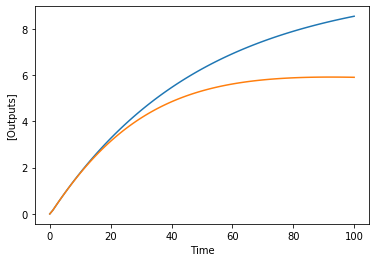

In [5]:
from auto_reduce.utils import get_ODE
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
plt.xlabel('Time')
plt.ylabel('[Outputs]')
plt.show()

In [6]:
from auto_reduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,100)
sys_ssm = get_SSM(sys, timepoints_ssm)
Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)
out_Ss = []
for i in range(len(params)):
    out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


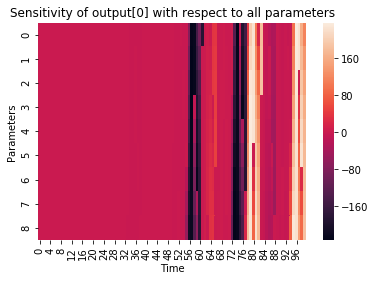

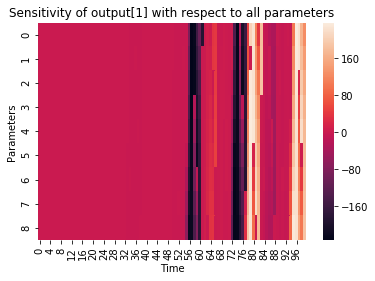

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
for j in range(nouts):
    sn.heatmap(out_Ss[:,:,j].T)
    plt.xlabel('Time')
    plt.ylabel('Parameters')
    plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    plt.show()

In [3]:
from auto_reduce.utils import reduce
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)
results = sys_reduce.reduce_Cx()

attempting : [2, 3]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)
C:\Users\apand\synBio\auto_reduce\auto_reduce\model_reduction.py:176: ComplexWarning: Casting complex values to real discards the imaginary part
  Se[j] = max_eigP + 2*len(reduced_ssm.timepoints)*S_metric_max


Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 3]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [1, 2, 3]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [4]:
results

{<auto_reduce.system.System at 0x263f80645f8>: [78.04410582313837,
  array([3.46309351e+02, 8.81114889e+02, 5.07333129e+05, 5.07333129e+05,
         5.07333129e+05, 5.07333129e+05, 1.84583780e+06, 1.84583780e+06,
         1.84583780e+06])],
 <auto_reduce.system.System at 0x263f73ae978>: [77.95194333781714,
  array([1.01598787e+03, 1.01598787e+03, 4.65181505e+05, 4.65181505e+05,
         4.65181505e+05, 4.65181505e+05, 4.65181505e+05, 4.65181505e+05,
         2.71141913e+06])],
 <auto_reduce.system.System at 0x263f8a412b0>: [77.95208871173985,
  array([5.66853458e+02, 1.02850451e+03, 4.15801121e+05, 4.15801121e+05,
         4.15801121e+05, 4.15801121e+05, 4.15801121e+05, 1.17976207e+06,
         1.17976207e+06])]}

In [4]:
sys_reduce.get_output_states()
T, T1, T2 = sys_reduce.get_T([2,3])